In [1]:
%matplotlib inline
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing(use_unicode=True)

In [2]:
r, u, v, c, r_c, u_c, v_c, E, p, r_p, u_p, v_p, e, a, b, q, b_0, b_1, b_2, b_3, q_0, q_1, q_2, q_3, q_4, q_5, beta, rho, epsilon, delta, d, K_3, Omega, Lambda, lamda, C, mu, Gamma, tau, nu, xi, P_x, eta, varep, gamma, P_0, theta_0, z, a_0, alpha_0, alpha, T_p, T_c, T = symbols('r u v c r_c u_c v_c E p r_p u_p v_p e a b q b_0 b_1 b_2 b_3 q_0 q_1 q_2 q_3 q_4 q_5 beta rho epsilon delta d K_3 Omega Lambda lamda C mu Gamma tau nu xi_2 P_x eta varepsilon gamma P_0 theta_0 z a_0 alpha_0 alpha T_p T_c T')

In [3]:
eptil, atil, btil, ctil, Ctil, gtil, thetatil, Ptil, gprm, thetaprm, Pprm, Tprm, chiprm = symbols('epsilontilde atilde btilde ctilde Ctilde gtilde_{0} thetatilde_{0} Ptilde_{0} gprm thetaprm Pprm Tprm chiprm')

#Generalized Landau Model of Ferroelectric Liquid Crystals

In [4]:
def g1(a,b,q,xi,P_x,varep,eta,C,Omega):
    return (a*xi**2)/2+(b*xi**4)/4+(q*xi**6)/6+P_x**2/(2*varep)+(eta*P_x**4)/4+C*P_x*xi-(Omega*(P_x*xi)**2)/2

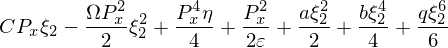

In [5]:
g1(a,b,q,xi,P_x,varep,eta,C,Omega)

In [6]:
g = (a*xi**2)/2+(b*xi**4)/4+(q*xi**6)/6+P_x**2/(2*epsilon)+(eta*P_x**4)/4+C*P_x*xi-(Omega*(P_x*xi)**2)/2

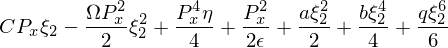

In [7]:
g

####$f(c,p) = \dfrac{1}{2}r_{c}c^{2}+\dfrac{1}{4}u_{c}c^{4}+\dfrac{1}{6}v_{c}c^{6}+\dfrac{1}{2}r_{p}p^{2}+\dfrac{1}{4}u_{p}p^{4}+\dfrac{1}{6}v_{p}p^{6}-\gamma cp-ec^{2}p^{2}-Ep$

###'Our' version of the equation

$P_x \neq 0 = p$

$P_y = 0$

$\xi_1 = 0$

$\xi_2 \neq 0 = c$

$r_p = \dfrac{1}{\epsilon}$

$u_p = \eta$

$\gamma = -C$

$e = \dfrac{1}{2}\Omega$

###Missing: $p^6$ and $E$ terms

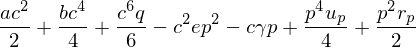

In [8]:
g.subs([(epsilon,1/r_p),(eta,u_p),(C,-gamma),(Omega,2*e),(xi,c),(P_x,p)])

#Electrically Induced Tilt in Achiral Bent-Core Liquid Crystals

In [4]:
fc = a*c**2+b*c**4+q*c**6
fp = alpha*p**2+beta*p**4+gamma*p**6-E*p
fcp = -Omega*(p*c)**2

In [5]:
fc

In [6]:
fp

In [7]:
fcp

###Mapping:

$\dfrac{1}{2}r_c = a = a_{0}(T-T_c) = 6\times10^4$ $\text{ N/K m}^2$

$\dfrac{1}{4}u_c = b = 10^4 \text{ N/m}^2$

$\dfrac{1}{6}v_c = q = 9\times10^7 \text{ N/m}^2$

$\dfrac{1}{2}r_p = \alpha = \alpha_{0}(T-T_p) = 0.6\times10^9 \text{ J m/C}^2$

$\dfrac{1}{4}u_p = \beta \approx 10^4 \dfrac{ J m^5}{C^4}$

$\dfrac{1}{6}v_p = \gamma = 0$

$e = \Omega$

In [8]:
# fc = fc.subs([(a_0*(T-T_c),a)])#,6e4),(b,10**4),(q,9e7)])
# fc

In [9]:
fp = fp.subs([(gamma,0)])#,(alpha_0*(T-T_p),alpha),(beta,10**4)])
fp

###$\dfrac{\partial f}{\partial c} = 0$

In [10]:
collect((fc+fp+fcp).diff(c),c)

###Solve for $p$

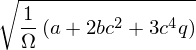

In [11]:
pc = solve((fc+fp+fcp).diff(c),p)[1]
pc

###Solve $\dfrac{\partial f}{\partial p} = 0$ for $E$

In [12]:
solve((fc+fp+fcp).diff(p),E)[0]

###Sub $p(c)$ into $E(c,p)$

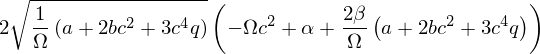

In [13]:
(solve((fc+fp+fcp).diff(p),E)[0]).subs(p,pc)

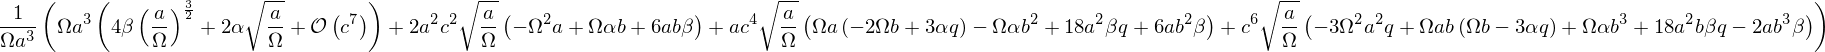

In [14]:
simplify(series((solve((fc+fp+fcp).diff(p),E)[0]).subs(p,pc),c,n=7))

###Define above equation for plotting

In [16]:
def Ecc(a,b,q,c,Omega,alpha,beta):
    return [2*np.sqrt((a+2*b*c**2+3*q*c**4)/Omega)*(alpha-Omega*c**2+(2*beta/Omega)*(a+2*b*c**2+3*q*c**4)),
            (Omega*a**3*(4*beta*(a/Omega)**(3/2)+2*alpha*np.sqrt(a/Omega))
            +2*(a*c)**2*np.sqrt(a/Omega)*(-Omega**2*a+Omega*alpha*b+6*a*b*beta)
            +a*c**4*np.sqrt(a/Omega)*(Omega*a*(-2*Omega*b+3*alpha*q)-Omega*alpha*b**2+18*a**2*beta*q+6*a*b**2*beta)
            +c**6*np.sqrt(a/Omega)*(-3*q*(Omega*a)**2+Omega*a*b*(Omega*b-3*alpha*q)+Omega*alpha*b**3+18*a**2*b*beta*q-2*a*b**3*beta))/(Omega*a**3)]

In [26]:
def coeff2(a,Omega,alpha,b,beta):
    return 2*a**2*np.sqrt(a/Omega)*(-Omega**2*a+Omega*alpha*b+6*a*b*beta)/(Omega*a**3)

In [27]:
simplify(coeff2(6e4*(116-114.1),10**10,0.6e9,10**4,10**4))

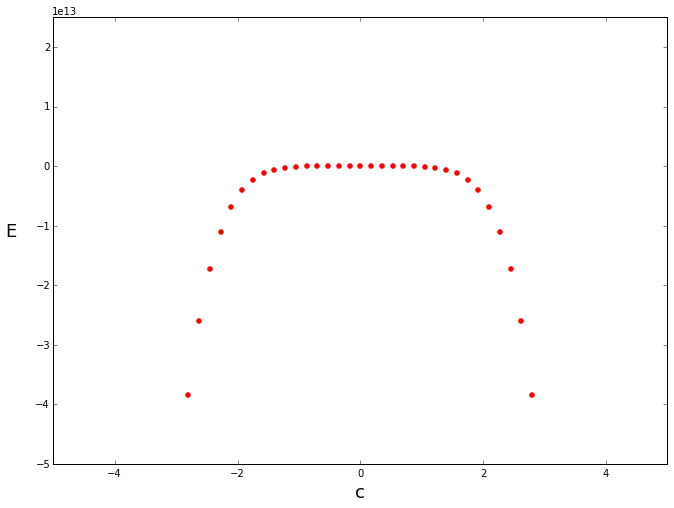

In [44]:
plt.figure(figsize=(11,8))
plt.scatter(np.linspace(-17.5,17.5,201),Ecc(6e4*(116-114.1),10**4,9e7,np.linspace(-17.5,17.5,201),10**10,0.6e9,10**4)[1],color='r',label='expand')
plt.ylim(-0.5e14,0.25e14),plt.xlim(-5,5)
plt.xlabel('c',fontsize=18)
plt.ylabel('E',rotation='horizontal',labelpad=25,fontsize=18);

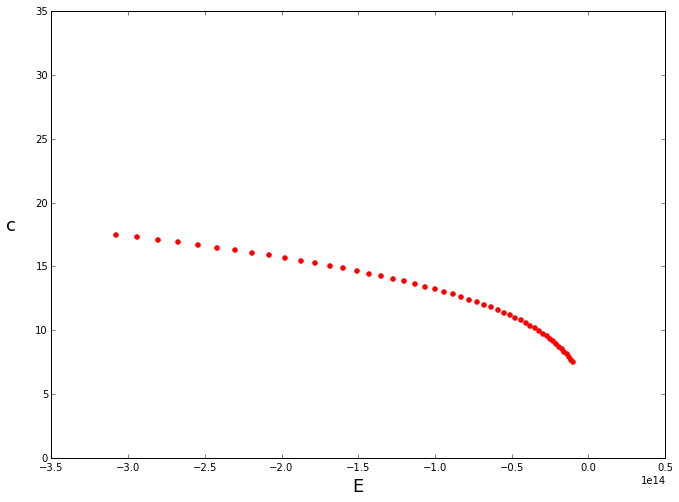

In [50]:
plt.figure(figsize=(11,8))
plt.scatter(Ecc(6e4*(116-114.1),10**4,9e7,np.linspace(7.5,17.5),10**10,0.6e9,10**4)[0],np.linspace(7.5,17.5),color='r',label='no expand')
plt.ylim(0,35)
plt.xlabel('E',fontsize=18)
plt.ylabel('c',rotation='horizontal',labelpad=25,fontsize=18);

###$\dfrac{\partial f}{\partial p} = 0$

In [17]:
(fc+fp+fcp).diff(p)

###Solve for $c$

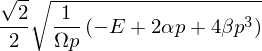

In [40]:
solve((fc+fp+fcp).diff(p),c)[1]

###Sub $c(p)$ into $p(c)$

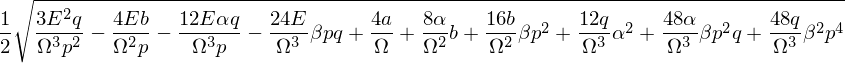

In [50]:
expand(simplify(pc.subs(c,solve((fc+fp+fcp).diff(p),c)[1])),p)

###Solve for $E(p)$

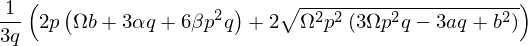

In [52]:
simplify(solve(expand(simplify(pc.subs(c,solve((fc+fp+fcp).diff(p),c)[1])),p)-p,E)[1])

###Define above equation for plotting

In [46]:
def Epp(a,b,q,alpha,beta,Omega,p):
    return (2*p*(Omega*b+3*alpha*q+6*beta*q*p**2)+2*Omega*p*np.sqrt(3*Omega*q*p**2-3*a*q+b**2))/(3*q)

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from IPython.kernel.zmq import kernelapp as app


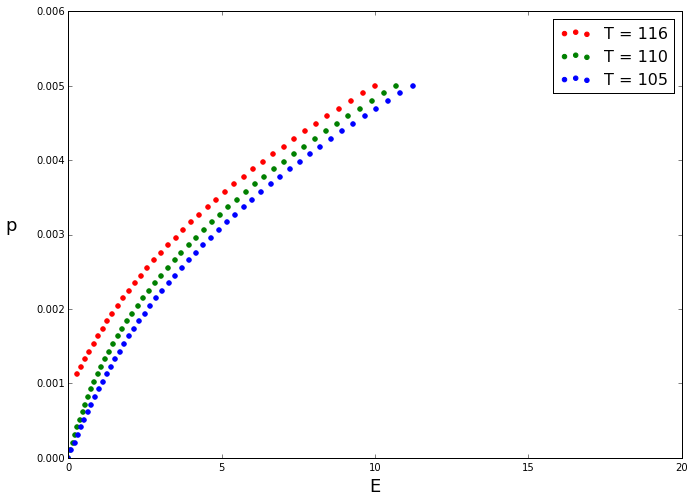

In [55]:
plt.figure(figsize=(11,8))
plt.scatter(Epp(6e4*(116-114.1),10**4,9e7,0.6e9,10**4,10**11,np.linspace(0,0.005))/10**7,np.linspace(0,0.005),color='r',label='T = 116')
plt.scatter(Epp(6e4*(110-114.1),10**4,9e7,0.6e9,10**4,10**11,np.linspace(0,0.005))/10**7,np.linspace(0,0.005),color='g',label='T = 110')
plt.scatter(Epp(6e4*(105-114.1),10**4,9e7,0.6e9,10**4,10**11,np.linspace(0,0.005))/10**7,np.linspace(0,0.005),color='b',label='T = 105')
plt.ylim(0,0.006),plt.xlim(0,20)
plt.xlabel('E',fontsize=18)
plt.ylabel('p',rotation='horizontal',labelpad=25,fontsize=18)
plt.legend(loc='upper right',fontsize=16);

In [19]:
def ppp(a,b,q,Omega,c):
    return np.sqrt((a+2*b*c**2+3*q*c**4)/Omega)

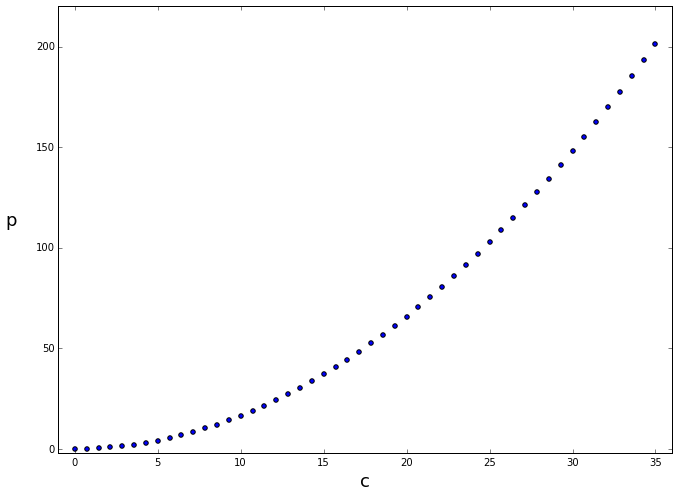

In [20]:
plt.figure(figsize=(11,8))
plt.scatter(np.linspace(0,35),ppp(6e4*(116-114.1),10**4,9e7,10**10,np.linspace(0,35)))
plt.ylim(-2,220),plt.xlim(-1,36)
plt.xlabel('c',fontsize=18)
plt.ylabel('p',rotation='horizontal',labelpad=25,fontsize=18);

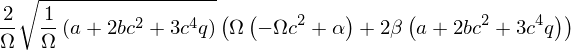

In [9]:
simplify((solve((fp+fcp).diff(p),E)[0]).subs(p,solve((fc+fp+fcp).diff(c),p)[1]))

In [64]:
def Ec(om, a, b, c, q, alp, beta):
    return (2/om)*np.sqrt((a+2*b*c**2+3*q*c**4)/om)*(alp*om-(c*om)**2+2*beta*a+4*b*beta*c**2+6*beta*q*c**4)

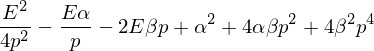

In [86]:
expand((alpha-E/(2*p)+2*beta*p**2)**2)

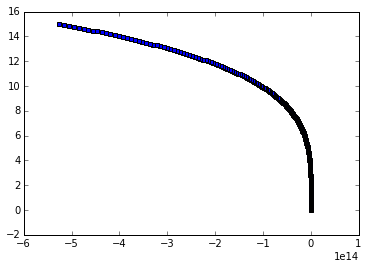

In [65]:
plt.scatter(Ec(10**11,6e4,10**4,np.linspace(0,15,200),9e7,0.6e9,10**4),np.linspace(0,15,200),marker='s');

In [48]:
def Eth(T):
    E = []
    for i in T:
        if i > 114.1:
            E.append(0.64e6*(i-100)*np.sqrt(i-114.1))
        else:
            E.append(0)
    return E

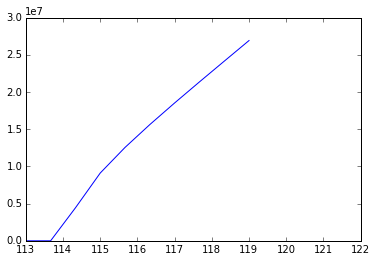

In [58]:
plt.plot(np.linspace(113,119,10),Eth(np.linspace(113,119,10)))
plt.xlim(113,122),plt.ylim(0,3e7);